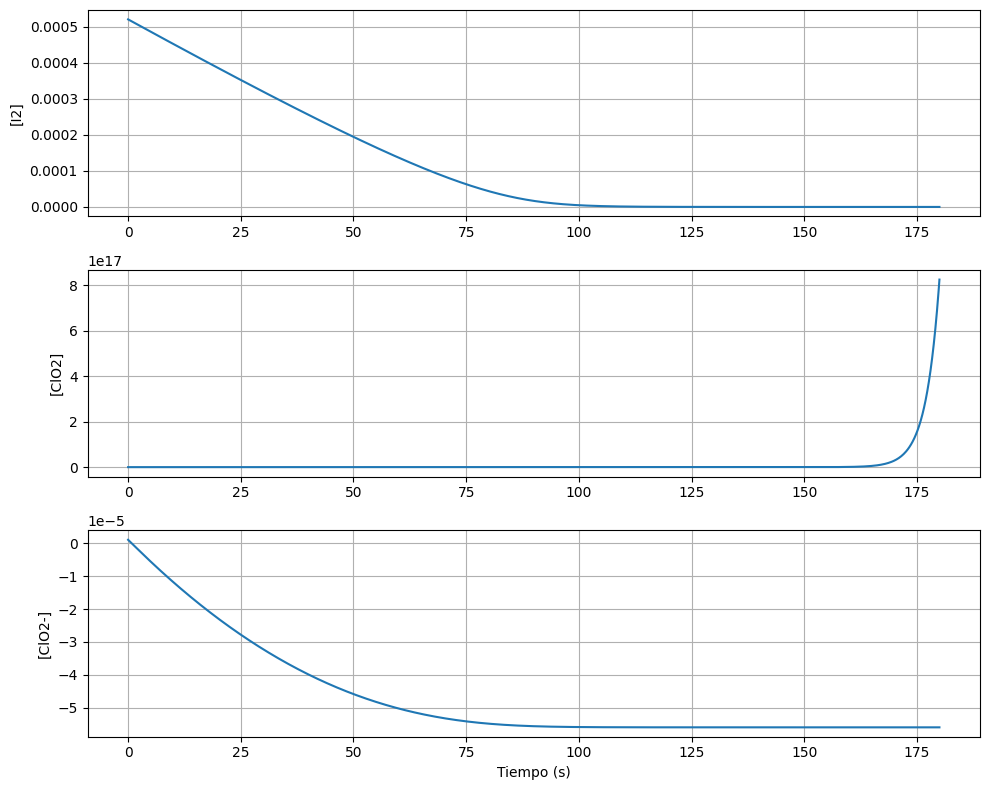

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constantes del sistema (ajusta estos valores de acuerdo a tu documento)
K1a = 7.5e-3  # constante de reacción para MA e I2
K1b = 5e-5  # constante de saturación para I2
K2 = 6e3   # constante para ClO2 e I-
K3a = 4.6e2  # constante para ClO2- e I-
K3b = 2.65e-3  # constante para ClO2- e I2
mu = 1.0e-14   # constante para la inhibición de I-
H_plus = 1.0e-7  # Concentración de H+ en mol/L (pH neutro)
MA = 1.0e-3  # Concentración de MA en mol/L

# Condiciones iniciales
I2_0 = 5.2e-4      # Concentración inicial de I2 (mol/L)
ClO2_0 = 1.0e-4    # Concentración inicial de ClO2 (mol/L)
ClO2_minus_0 = 1.0e-6  # Concentración inicial de ClO2- (mol/L)
I_minus_0 = 1.0e-6     # Concentración inicial de I- (mol/L)

# Sistema de ecuaciones diferenciales
def reaction_system(t, y):
    I2, ClO2, ClO2_minus, I_minus = y

    # Ecuaciones diferenciales
    dI2_dt = -(K1a * MA * I2) / (K1b + I2)
    dClO2_dt = -K2 * ClO2 * I_minus
    dClO2_minus_dt = -K3a * ClO2_minus * I_minus * H_plus - K3b * ClO2_minus * I2 * (I_minus / (mu + I_minus**2))

    return [dI2_dt, dClO2_dt, dClO2_minus_dt, dClO2_minus_dt]

# Condiciones iniciales
y0 = [I2_0, ClO2_0, ClO2_minus_0, I_minus_0]

# Tiempo para la simulación
t_span = (0, 180)  # Tiempo de simulación en segundos
t_eval = np.linspace(0, 180, 1000)  # Puntos de tiempo donde se evaluará la solución

# Resolver las ecuaciones diferenciales
sol = solve_ivp(reaction_system, t_span, y0, t_eval=t_eval)

# Graficar los resultados
plt.figure(figsize=(10, 8))

# Graficar I2
plt.subplot(3, 1, 1)
plt.plot(sol.t, sol.y[0])
plt.ylabel('[I2]')
plt.grid()

# Graficar ClO2
plt.subplot(3, 1, 2)
plt.plot(sol.t, sol.y[1])
plt.ylabel('[ClO2]')
plt.grid()

# Graficar ClO2-
plt.subplot(3, 1, 3)
plt.plot(sol.t, sol.y[2])
plt.ylabel('[ClO2-]')
plt.xlabel('Tiempo (s)')
plt.grid()

plt.tight_layout()
plt.show()


### Paso 1: Definir las ecuaciones diferenciales del sistema

El sistema dinámico está dado por las siguientes ecuaciones diferenciales:

- $$ y' = b \cdot x \left(1 - \frac{y}{1+x^2}\right) $$
- $$ x' = a - x - \frac{4xy}{1+x^2} $$


Estas ecuaciones describen la evolución temporal de las concentraciones de las especies involucradas. En el sistema, \( a \) y \( b \) son parámetros que afectan el comportamiento global. En particular, la relación entre \( a \) y \( b \) define si el sistema será oscilatorio.

En este paso, importaremos las librerías necesarias y definiremos las ecuaciones diferenciales que describen el sistema.


In [ ]:
# Parámetros del sistema
a = 20.0  # Puedes cambiar este valor según el análisis
b = 2.0  # El valor debe cumplir la condición: b < (3a/5) - (25/a)

# Definir las ecuaciones diferenciales
def system(t, vars):
    x, y = vars
    dxdt = a - x - (4 * x * y) / (1 + x**2)
    dydt = b * x * (1 - y / (1 + x**2))
    return [dxdt, dydt]


### Paso 2: Verificar la condición para el comportamiento oscilatorio

El comportamiento oscilatorio del sistema depende de la relación entre los parámetros \( a \) y \( b \). Para que el sistema exhiba oscilaciones, la siguiente condición debe cumplirse:

$$ b < \frac{3a}{5} - \frac{25}{a} $$

En este paso, vamos a calcular y verificar si el valor de \( b \) cumple con esta condición, lo que nos permitirá determinar si el sistema será oscilatorio o no.


In [ ]:
# Condición oscilatoria
condicion_oscilatoria = (3*a/5) - (25/a)

if b < condicion_oscilatoria:
    print(f'El sistema es oscilatorio ya que b = {b} cumple con la condición: b < {condicion_oscilatoria:.2f}')
else:
    print(f'El sistema NO es oscilatorio ya que b = {b} no cumple con la condición: b < {condicion_oscilatoria:.2f}')


El sistema es oscilatorio ya que b = 2.0 cumple con la condición: b < 10.75


#### Visualización del campo vectorial del sistema dinámico

En este sub-paso, graficamos el campo vectorial del sistema, que nos muestra la dirección y magnitud de las tasas de cambio de \(x\) e \(y\) en el espacio fase. Esto nos permite visualizar las trayectorias que seguirían las soluciones del sistema en función de las condiciones iniciales.


In [ ]:
# Definir el sistema de ecuaciones diferenciales
def system_2(x, y):
    dxdt = a - x - (4 * x * y) / (1 + x**2)
    dydt = b * x * (1 - y / (1 + x**2))
    return dxdt, dydt

# Crear una malla de puntos en el espacio fase (x, y)
x_vals = np.linspace(0.3, 10, 22)  # Ajustar los límites del rango de x
y_vals = np.linspace(0.3, 42, 22)  # Ajustar los límites del rango de y
X, Y = np.meshgrid(x_vals, y_vals)

# Calcular los valores de las derivadas dx/dt y dy/dt en cada punto de la malla
U, V = np.zeros(X.shape), np.zeros(Y.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        U[i, j], V[i, j] = system_2(X[i, j], Y[i, j])

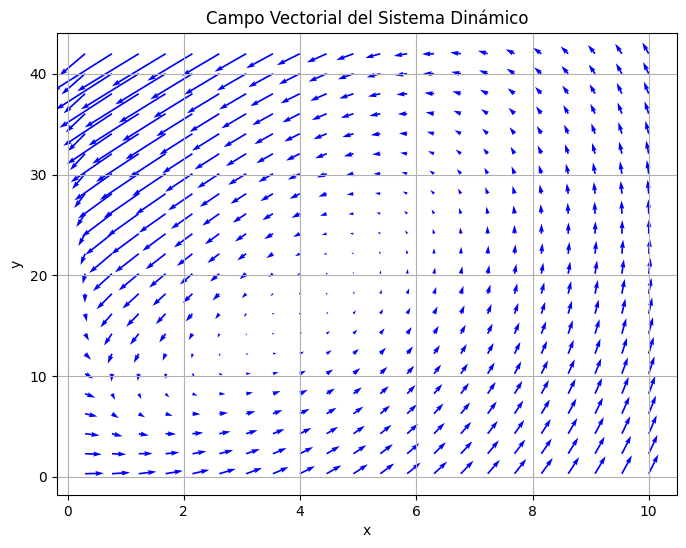

In [ ]:
# Graficar el campo vectorial
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color='blue')
plt.title('Campo Vectorial del Sistema Dinámico')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

### Paso 3: Establecer los puntos críticos y el área de interés

El punto crítico del sistema es:

$$ (x^*, y^*) = \left(\frac{a}{5}, 1 + \left(\frac{a}{5}\right)^2\right) $$

Este punto representa un estado de equilibrio en el que las concentraciones no cambian.

Además, vamos a definir un área de interés en el espacio fase, que está delimitada por los siguientes vértices:
- \( 0, 1 + a^2 \)
- \( 0, 0 \)
- \( a, 0 \)
- \( a, 1 + a^2 \)

Este área ayudará a visualizar el comportamiento del sistema en un entorno que podría exhibir características oscilatorias.


In [ ]:
# Puntos críticos
x_crit = a / 5
y_crit = 1 + (x_crit)**2

print(f'Punto crítico: (x*, y*) = ({x_crit:.2f}, {y_crit:.2f})')

# Definir el área de interés (vértices)
vertices = np.array([
    [0, 1 + a**2],
    [0, 0],
    [a, 0],
    [a, 1 + a**2]
])


Punto crítico: (x*, y*) = (4.00, 17.00)


### Paso 4: Integrar las ecuaciones diferenciales y graficar las trayectorias

En este paso, vamos a resolver numéricamente el sistema de ecuaciones diferenciales usando el método de integración de `solve_ivp`. Además, graficaremos las trayectorias del sistema en el espacio fase, que muestran cómo varían las concentraciones \( x \) e \( y \) con el tiempo.

También destacaremos el área de interés previamente definida y el punto crítico, que puede servir de referencia visual para interpretar los resultados del sistema.


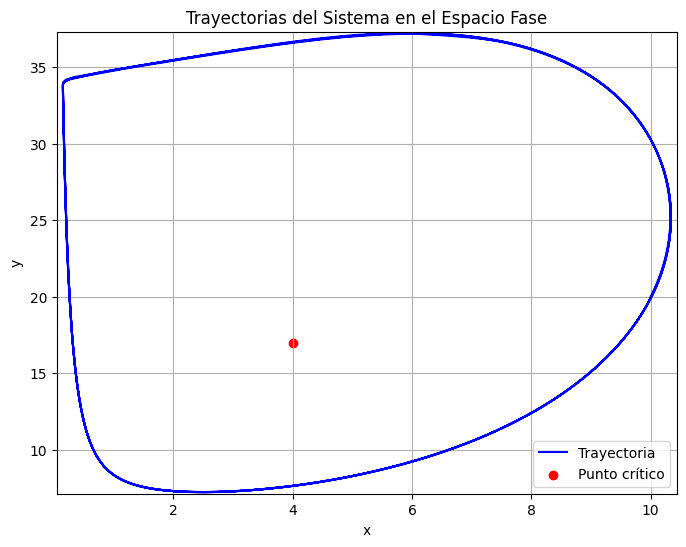

In [ ]:
# Condiciones iniciales
x0, y0 = 10, 20  # Puedes cambiar estos valores para explorar diferentes condiciones iniciales
z0 = [x0, y0]

# Intervalo de tiempo para la integración
t_span = [0, 100]
t_eval = np.linspace(0, 25, 1000)

# Resolver el sistema
sol = solve_ivp(system, t_span, z0, t_eval=t_eval)

# Extraer las soluciones de x e y
t_sol = sol.t
x_sol = sol.y[0]
y_sol = sol.y[1]

# Paso 4: Graficar las trayectorias y ajustar los límites de los ejes
plt.figure(figsize=(8, 6))
plt.plot(x_sol, y_sol, label="Trayectoria", color='b')
plt.scatter(a/5, 1 + (a/5)**2, color='r', label="Punto crítico")

# Ajustar el gráfico para que solo muestre el rango de las soluciones
plt.xlim(min(x_sol) - 0.1, max(x_sol) + 0.1)
plt.ylim(min(y_sol) - 0.1, max(y_sol) + 0.1)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Trayectorias del Sistema en el Espacio Fase')
plt.legend()
plt.grid(True)
plt.show()

#### Visualización de la trayectoria en el espacio 3D con punto inicial destacado

En este gráfico tridimensional, se muestran las trayectorias de las variables \(x(t)\) e \(y(t)\) en función del tiempo \(t\). El punto inicial de la trayectoria se ha resaltado en color rojo para marcar claramente el inicio de la evolución del sistema.

Este tipo de visualización en 3D es útil para observar cómo el sistema dinámico evoluciona con el tiempo en el espacio fase.


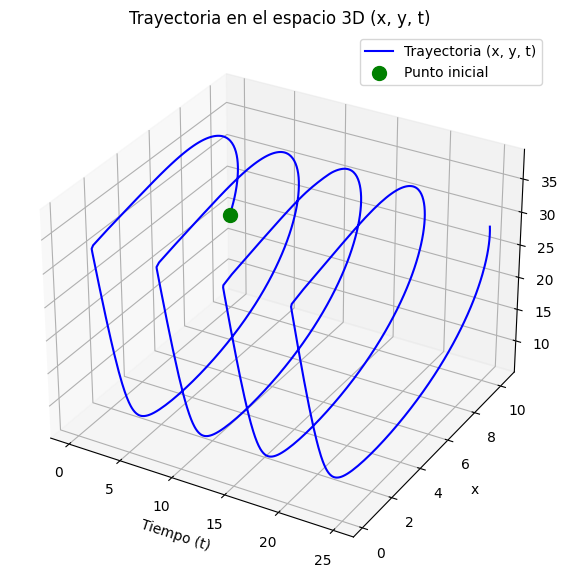

In [ ]:
# Crear la figura 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar las trayectorias en 3D
ax.plot3D(t_sol, x_sol, y_sol, color='b', label='Trayectoria (x, y, t)')

# Graficar el punto inicial en rojo
ax.scatter(t_sol[0], x_sol[0], y_sol[0], color='g', s=100, label='Punto inicial')

# Añadir etiquetas a los ejes
ax.set_xlabel('Tiempo (t)')
ax.set_ylabel('x')
ax.set_zlabel('y')

# Añadir título y leyenda
ax.set_title('Trayectoria en el espacio 3D (x, y, t)')
ax.legend()

# Mostrar el gráfico
plt.show()

### Paso 5: Graficar \(x\) con respecto al tiempo

Ahora analizamos cómo varía la variable \(x\) en función del tiempo para observar cómo evoluciona su dinámica temporal. Esto nos permitirá identificar el comportamiento oscilatorio y evaluar la estabilidad de la solución.


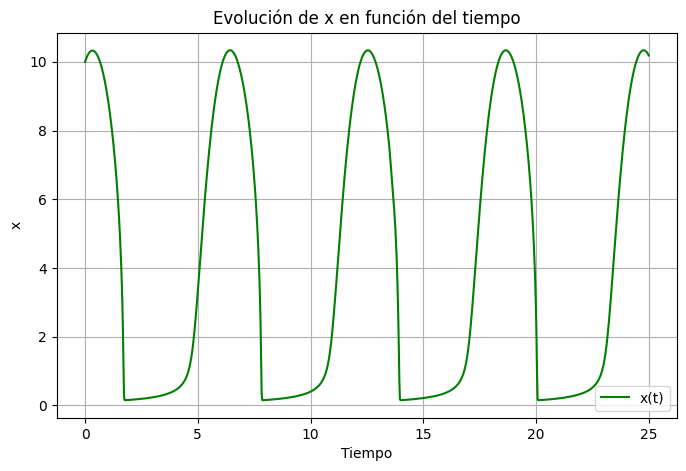

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(sol.t, x_sol, label="x(t)", color='g')
plt.xlabel('Tiempo')
plt.ylabel('x')
plt.title('Evolución de x en función del tiempo')
plt.legend()
plt.grid(True)
plt.show()


### Paso 6: Graficar \(y\) con respecto al tiempo

De manera similar, visualizaremos cómo varía la concentración de la variable \(y\) en función del tiempo. Esto nos ayudará a complementar el análisis del comportamiento temporal del sistema.


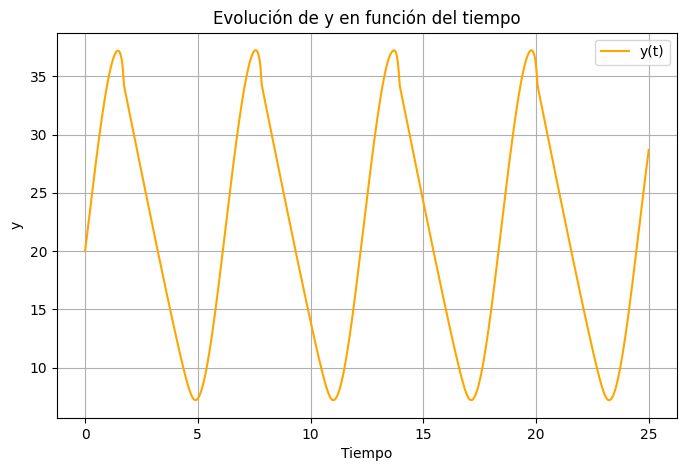

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(sol.t, y_sol, label="y(t)", color='orange')
plt.xlabel('Tiempo')
plt.ylabel('y')
plt.title('Evolución de y en función del tiempo')
plt.legend()
plt.grid(True)
plt.show()


### Paso 7: Crear un DataFrame para utilizar los datos en el entrenamiento de un modelo de machine learning

Finalmente, los datos generados para las variables \(x\) y \(y\) con respecto al tiempo se exportarán a un `DataFrame` de `pandas`. Este formato te permitirá entrenar modelos de machine learning utilizando la evolución temporal de las variables como insumo.


In [ ]:
import pandas as pd

# Paso 7: Crear DataFrame con los datos de x, y y el tiempo
df = pd.DataFrame({
    'Tiempo': sol.t,
    'x': x_sol,
    'y': y_sol
})

# Mostrar las primeras filas del DataFrame
print(df.head())

     Tiempo          x          y
0  0.000000  10.000000  20.000000
1  0.025025  10.049905  20.401911
2  0.050050  10.095583  20.804699
3  0.075075  10.137077  21.208120
4  0.100100  10.174427  21.611937


### Paso 8: Entrenar un modelo

En este paso, definimos una función `create_time_series` que toma un conjunto de datos y genera ventanas de tiempo (lags). Estas ventanas permitirán al modelo aprender la dependencia temporal de las variables.

La función toma dos parámetros:
- `df`: el DataFrame que contiene los datos de entrada.
- `time_steps`: el número de pasos de tiempo que se utilizarán para crear la ventana.

A continuación, aplicamos esta función a los datos de `x` y `y`, creando así las matrices de características `X` e etiquetas `y`. La estructura de `X` consistirá en secuencias de `time_steps` pasos, y `y` contendrá los valores de `x` e `y` futuros. Finalmente, dividimos los datos en conjuntos de entrenamiento y prueba.


In [ ]:
# Función para crear ventanas de series de tiempo
def create_time_series(df, time_steps=5):
    X, y = [], []
    for i in range(len(df) - time_steps):
        X.append(df[i:(i + time_steps), :])
        y.append(df[i + time_steps, :])
    return np.array(X), np.array(y)

# Usamos el DataFrame generado previamente con los valores de 'x' y 'y'
data = df[['x', 'y']].values

# Creamos las series de tiempo con una ventana de tiempo de 5 pasos
time_steps = 5
X, y = create_time_series(data, time_steps)

# Dividimos en entrenamiento y prueba
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Verificamos la forma de los datos
print(X_train.shape, y_train.shape)

(796, 5, 2) (796, 2)


### Paso 9: Definir y entrenar el modelo LSTM

En este paso, definimos un modelo de red neuronal LSTM usando Keras. La arquitectura de la red neuronal incluye:
- Una capa LSTM con 10 neuronas, donde se especifica que la entrada tendrá la forma `(time_steps, 2)`, que corresponde a las ventanas de tiempo que creamos.
- Una capa densa adicional con 10 neuronas y función de activación 'relu'.
- Una capa de salida con 2 neuronas, que representan las predicciones futuras para `x` e `y`.

A continuación, compilamos el modelo utilizando el optimizador Adam y la pérdida de error cuadrático medio (MSE). Después de compilar el modelo, lo entrenamos con el conjunto de datos de entrenamiento, utilizando 100 épocas y un tamaño de lote de 32. También se utiliza una parte de los datos de entrenamiento para validación.

Además, evaluamos el rendimiento del modelo en el conjunto de prueba. La función `evaluate` devuelve la pérdida del modelo en el conjunto de datos de prueba. Esta información es crucial para entender cómo se comporta el modelo con datos que no ha visto anteriormente.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Definir el modelo LSTM
model = Sequential([
    LSTM(10, activation='relu', input_shape=(time_steps, 2), return_sequences=False),
    Dense(10, activation='relu'),
    Dense(2)  # Salida con 2 neuronas (para x e y futuros)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=500, batch_size=16, validation_split=0.2) # Son 500 epocas pero se pondran 10 para probar graficos

# Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')


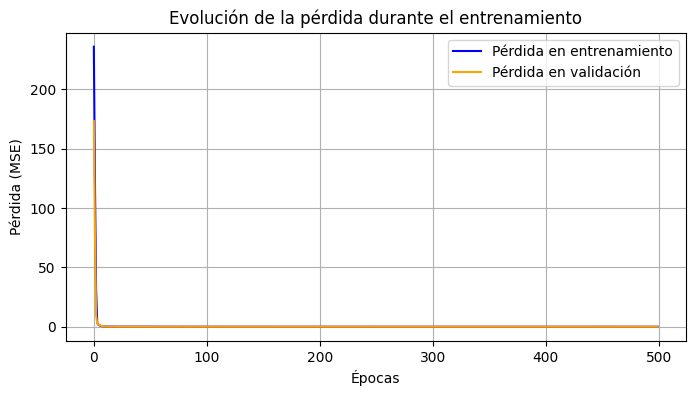

In [ ]:
# Graficar la evolución de la pérdida (loss) durante el entrenamiento
plt.figure(figsize=(8, 4))

# Graficar la pérdida de entrenamiento
plt.plot(history.history['loss'], label='Pérdida en entrenamiento', color='blue')

# Graficar la pérdida de validación
plt.plot(history.history['val_loss'], label='Pérdida en validación', color='orange')

# Añadir etiquetas y título
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.grid(True)
plt.show()


### Paso 10: Predecir para todos los datos

Aquí, utilizamos la función `create_time_series` nuevamente para crear ventanas de tiempo que abarcan todos los datos disponibles. Esto nos permite realizar predicciones para toda la serie temporal, no solo para el conjunto de prueba.

Después de obtener las predicciones, unimos estas predicciones con los valores reales en un nuevo DataFrame llamado `df_pred`. Este DataFrame contiene las columnas para el tiempo, los valores reales de `x` e `y`, y las predicciones correspondientes para `x` e `y`.


In [ ]:
# Crear series de tiempo para todos los datos
X_all, y_all = create_time_series(data, time_steps)

# Predecir para todos los datos
y_pred_all = model.predict(X_all)

# Unir las predicciones con los valores reales en un DataFrame
df_pred = pd.DataFrame({
    'Tiempo': df['Tiempo'][time_steps:].values,  # Ajustar las fechas/tiempos
    'x_real': y_all[:, 0],
    'y_real': y_all[:, 1],
    'x_predicho': y_pred_all[:, 0],
    'y_predicho': y_pred_all[:, 1]
})

# Ver las primeras filas del DataFrame
print(df_pred.head())


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
     Tiempo     x_real     y_real  x_predicho  y_predicho
0  0.125125  10.207661  22.015885   10.202560   22.029663
1  0.150150  10.236765  22.419633   10.233881   22.434830
2  0.175175  10.261799  22.822984   10.261250   22.839355
3  0.200200  10.282828  23.225755   10.284517   23.242954
4  0.225225  10.299915  23.627759   10.303563   23.645363


#### Gráfico de dispersión de predicciones vs valores reales
En este bloque de código, se generan dos gráficos de dispersión: uno para la variable `y` y otro para la variable `x`.
- **Propósito**: Comparar los valores predichos por el modelo con los valores reales, visualizando la dispersión de los datos.
- **Gráficos**:
    - El gráfico de la izquierda muestra la relación entre el valor real de `y` y su predicción.
    - El gráfico de la derecha muestra lo mismo para `x`.
- **Interpretación**: La línea negra punteada representa el ideal, donde las predicciones coinciden perfectamente con los valores reales (predicción perfecta).
- Si los puntos están muy dispersos alrededor de la línea, eso indica que el modelo está cometiendo errores significativos en las predicciones.

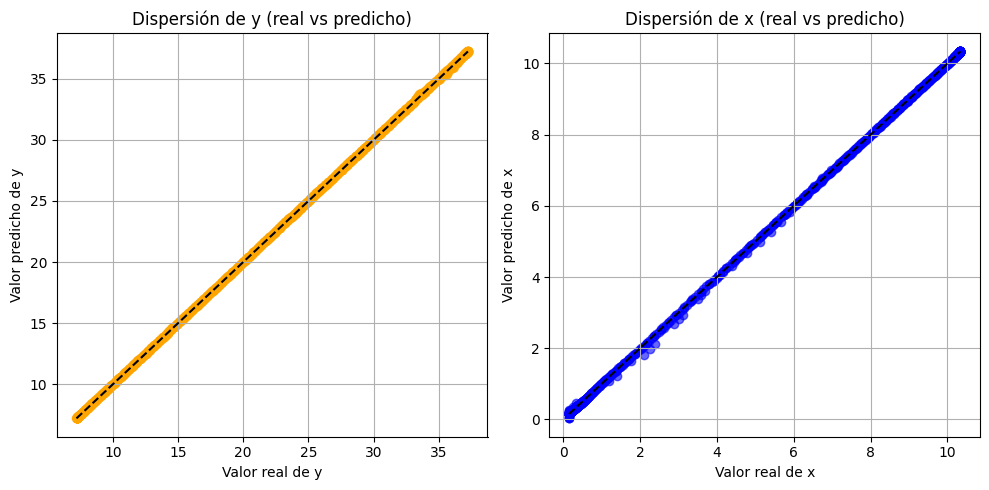

In [ ]:
# Crear una figura con dos subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico de dispersión para 'y' en el subplot de la izquierda
axes[0].scatter(df_pred['y_real'], df_pred['y_predicho'], color='orange', alpha=0.6)
axes[0].plot([df_pred['y_real'].min(), df_pred['y_real'].max()],
             [df_pred['y_real'].min(), df_pred['y_real'].max()], color='black', linestyle='--')
axes[0].set_title('Dispersión de y (real vs predicho)')
axes[0].set_xlabel('Valor real de y')
axes[0].set_ylabel('Valor predicho de y')
axes[0].grid(True)

# Gráfico de dispersión para 'x' en el subplot de la derecha
axes[1].scatter(df_pred['x_real'], df_pred['x_predicho'], color='blue', alpha=0.6)
axes[1].plot([df_pred['x_real'].min(), df_pred['x_real'].max()],
             [df_pred['x_real'].min(), df_pred['x_real'].max()], color='black', linestyle='--')
axes[1].set_title('Dispersión de x (real vs predicho)')
axes[1].set_xlabel('Valor real de x')
axes[1].set_ylabel('Valor predicho de x')
axes[1].grid(True)

# Ajustar el espacio entre subplots para que no se solapen
plt.tight_layout()

# Mostrar la figura
plt.show()

#### Cálculo y análisis de los errores
En este bloque de código, calculamos los errores de predicción (es decir, la diferencia entre los valores reales y los valores predichos) tanto para `x` como para `y`.
- **Errores**: Un error positivo significa que el modelo sobreestima el valor real, mientras que un error negativo indica una subestimación.
- **Estadísticas calculadas**:
    - **Media**: Indica el error promedio. Un valor cercano a cero es deseable.
    - **Desviación estándar**: Mide la dispersión de los errores. Un valor bajo significa que los errores están concentrados cerca de la media.
    - **Rango (amplitud)**: Muestra la diferencia entre el error máximo y mínimo, lo cual da una idea de la variabilidad total.

In [ ]:
# Calcular los errores (diferencia entre predicción y valor real)
error_x = df_pred['x_real'] - df_pred['x_predicho']
error_y = df_pred['y_real'] - df_pred['y_predicho']

# Calcular estadísticas para los errores en x e y
mean_error_x = np.mean(error_x)
std_error_x = np.std(error_x)
range_error_x = np.ptp(error_x)  # ptp calcula el rango (amplitud)

mean_error_y = np.mean(error_y)
std_error_y = np.std(error_y)
range_error_y = np.ptp(error_y)

# Mostrar las estadísticas
print("Estadísticas de los errores en x:")
print(f"Media: {mean_error_x:.4f}")
print(f"Desviación estándar: {std_error_x:.4f}")
print(f"Rango (amplitud): {range_error_x:.4f}")

print("\nEstadísticas de los errores en y:")
print(f"Media: {mean_error_y:.4f}")
print(f"Desviación estándar: {std_error_y:.4f}")
print(f"Rango (amplitud): {range_error_y:.4f}")

Estadísticas de los errores en x:
Media: 0.0032
Desviación estándar: 0.0274
Rango (amplitud): 0.4043

Estadísticas de los errores en y:
Media: -0.0150
Desviación estándar: 0.0277
Rango (amplitud): 0.4461


#### Análisis de la distribución de los errores
Aquí generamos histogramas para visualizar cómo se distribuyen los errores en las predicciones de `x` y `y`. También se ajusta una curva gaussiana (distribución normal) sobre los datos.
- **Gráficos de densidad**:
    - El histograma muestra la frecuencia de los errores.
    - La curva gaussiana (en negro) nos ayuda a evaluar si los errores siguen una distribución normal.
- **Interpretación**:
    - Si los errores siguen aproximadamente una distribución normal, se esperaría que la mayoría estén cerca de la media y que el gráfico tenga forma de "campana de Gauss".
    - La desviación estándar nos permite entender qué tan dispersos están los errores alrededor de la media.
    - Si los errores se agrupan hacia el centro y la curva es estrecha, significa que los errores están bien distribuidos, lo que es una señal positiva para el modelo.

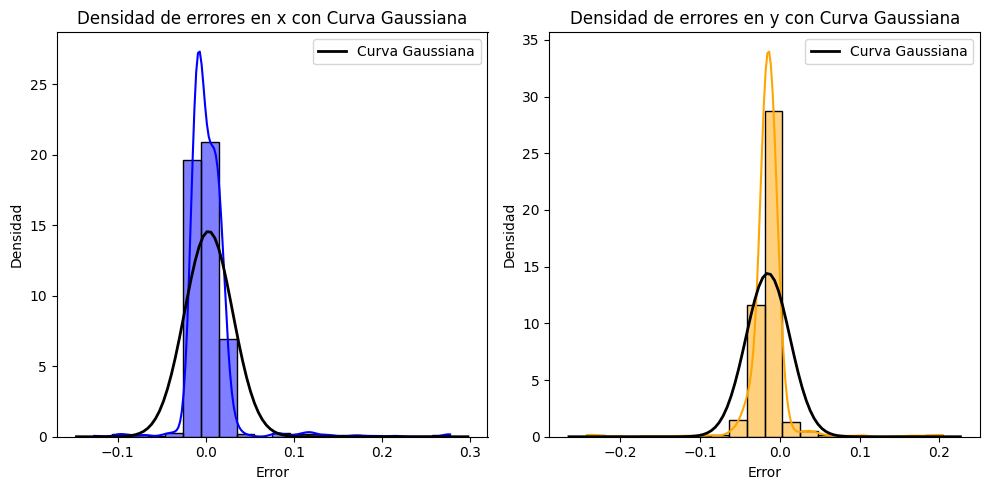

In [ ]:
import scipy.stats as stats
import seaborn as sns

# Crear una figura para el gráfico de densidad con la curva gaussiana
plt.figure(figsize=(10, 5))

# Densidad para los errores en 'x'
plt.subplot(1, 2, 1)
sns.histplot(error_x, bins=20, kde=True, color='blue', stat="density")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_error_x, std_error_x)
plt.plot(x, p, 'k', linewidth=2, label='Curva Gaussiana')
plt.title('Densidad de errores en x con Curva Gaussiana')
plt.xlabel('Error')
plt.ylabel('Densidad')
plt.legend()

# Densidad para los errores en 'y'
plt.subplot(1, 2, 2)
sns.histplot(error_y, bins=20, kde=True, color='orange', stat="density")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_error_y, std_error_y)
plt.plot(x, p, 'k', linewidth=2, label='Curva Gaussiana')
plt.title('Densidad de errores en y con Curva Gaussiana')
plt.xlabel('Error')
plt.ylabel('Densidad')
plt.legend()

# Ajustar espacio entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

#### Cálculo de Métricas de Rendimiento

Este bloque calcula las métricas de rendimiento para las variables `x` e `y`, usando las predicciones del modelo. Calculamos el Error Absoluto Medio (MAE), la Raíz del Error Cuadrático Medio (RMSE) y el Coeficiente de Determinación (R²). Estas métricas permiten evaluar la precisión y calidad del modelo en predicciones futuras.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculamos las métricas para la variable x
mae_x = mean_absolute_error(df_pred["x_real"], df_pred["x_predicho"])
rmse_x = np.sqrt(mean_squared_error(df_pred["x_real"], df_pred["x_predicho"]))
r2_x = r2_score(df_pred["x_real"], df_pred["x_predicho"])

# Calculamos las métricas para la variable y
mae_y = mean_absolute_error(df_pred["y_real"], df_pred["y_predicho"])
rmse_y = np.sqrt(mean_squared_error(df_pred["y_real"], df_pred["y_predicho"]))
r2_y = r2_score(df_pred["y_real"], df_pred["y_predicho"])

# Mostramos los resultados
print(f"MAE para x: {mae_x:.4f}, RMSE para x: {rmse_x:.4f}, R² para x: {r2_x:.4f}")
print(f"MAE para y: {mae_y:.4f}, RMSE para y: {rmse_y:.4f}, R² para y: {r2_y:.4f}")


MAE para x: 0.0140, RMSE para x: 0.0276, R² para x: 1.0000
MAE para y: 0.0196, RMSE para y: 0.0315, R² para y: 1.0000


#### Comparación de Métricas Entre Modelos

En este gráfico de barras, comparamos las métricas clave (MAE, RMSE y R²) entre las variables `x` e `y` de ambos modelos. Esta visualización nos permite evaluar cuantitativamente el rendimiento de cada modelo en términos de precisión y ajuste.


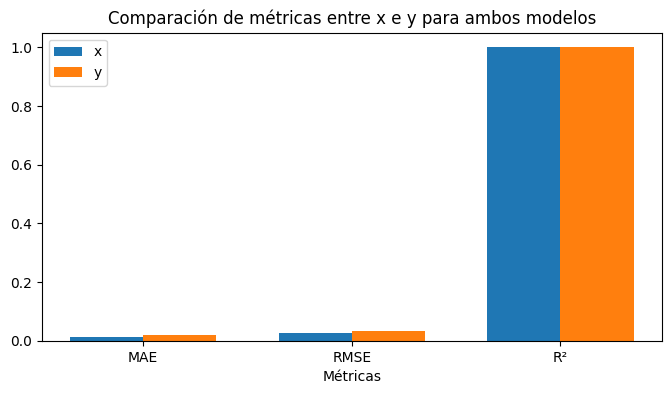

In [ ]:
# Gráfico comparativo de métricas
labels = ['MAE', 'RMSE', 'R²']
x_metrics = [mae_x, rmse_x, r2_x]
y_metrics = [mae_y, rmse_y, r2_y]

x = np.arange(len(labels))  # Posiciones de las barras

fig, ax = plt.subplots(figsize=(8, 4))
bar_width = 0.35
bar1 = ax.bar(x - bar_width/2, x_metrics, bar_width, label='x')
bar2 = ax.bar(x + bar_width/2, y_metrics, bar_width, label='y')

ax.set_xlabel('Métricas')
ax.set_title('Comparación de métricas entre x e y para ambos modelos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

#### Gráfico de Error Global

Aquí calculamos y graficamos el error global tanto para la variable `x` como para la variable `y`, comparando las predicciones y los valores reales a lo largo del tiempo. Este gráfico ayuda a observar cómo se comportan los errores a medida que avanzan las predicciones en ambos modelos.


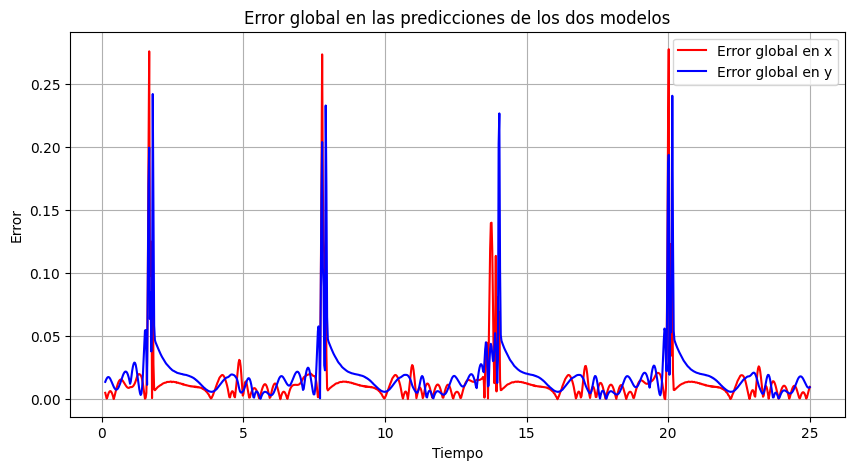

In [ ]:
# Calculamos el error global (a posteriori) entre ambos modelos
error_global_x = np.abs(df_pred["x_real"] - df_pred["x_predicho"])
error_global_y = np.abs(df_pred["y_real"] - df_pred["y_predicho"])

# Graficamos los errores globales
plt.figure(figsize=(10, 5))
plt.plot(df_pred['Tiempo'], error_global_x, label="Error global en x", color='r')
plt.plot(df_pred['Tiempo'], error_global_y, label="Error global en y", color='b')
plt.title('Error global en las predicciones de los dos modelos')
plt.xlabel('Tiempo')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

### Paso 11: Graficar los resultados de (x) y (y) frente al tiempo

Finalmente, visualizamos los resultados de las predicciones para las variables `x` e `y` en función del tiempo. Utilizamos `matplotlib` para crear gráficos donde comparamos los valores reales con las predicciones. Esto nos permite evaluar visualmente la precisión del modelo a lo largo del tiempo, identificando áreas donde el modelo puede haber fallado o donde se desempeñó bien.


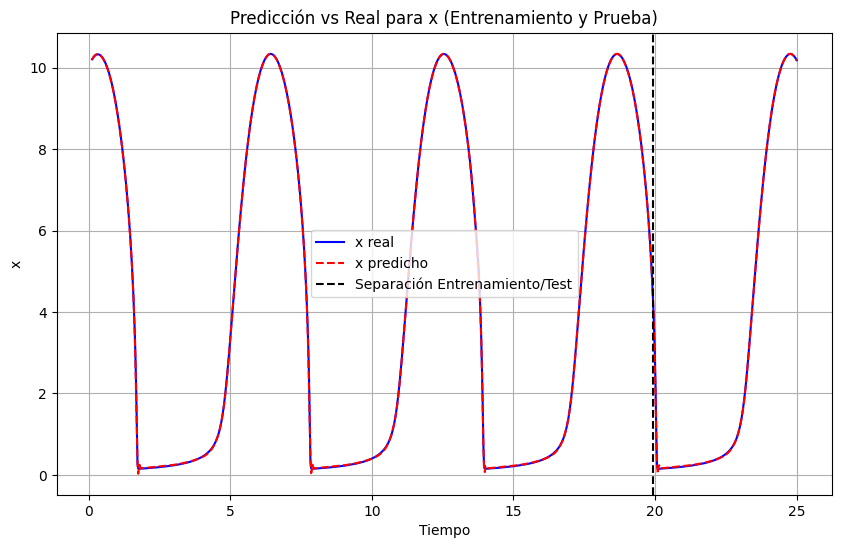

In [ ]:
# Dividir las predicciones en conjuntos de entrenamiento y prueba según el split_index
split_index_adjusted = split_index - time_steps

# Conjunto de entrenamiento
df_train_pred = df_pred.iloc[:split_index_adjusted].copy()

# Conjunto de prueba
df_test_pred = df_pred.iloc[split_index_adjusted:].copy()

# Crear una figura para los valores de x
plt.figure(figsize=(10, 6))

# Graficar los resultados reales y predichos de entrenamiento y prueba para x
plt.plot(df_pred['Tiempo'], df_pred['x_real'], label='x real', color='blue')
plt.plot(df_pred['Tiempo'], df_pred['x_predicho'], label='x predicho', color='red', linestyle='dashed')

# Añadir una línea vertical para separar entrenamiento y prueba
plt.axvline(x=df_pred['Tiempo'].iloc[split_index_adjusted], color='black', linestyle='--', label='Separación Entrenamiento/Test')

# Añadir títulos y etiquetas
plt.title('Predicción vs Real para x (Entrenamiento y Prueba)')
plt.xlabel('Tiempo')
plt.ylabel('x')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

#### Gráfico de la Predicción vs Real para y

Se graficaran los valores reales y predichos de la variable `y`, tanto para el conjunto de entrenamiento como el de prueba. La línea negra discontinua indica la separación entre los datos de entrenamiento y prueba. Este gráfico permite visualizar el rendimiento del modelo comparando las predicciones con los valores reales a lo largo del tiempo.


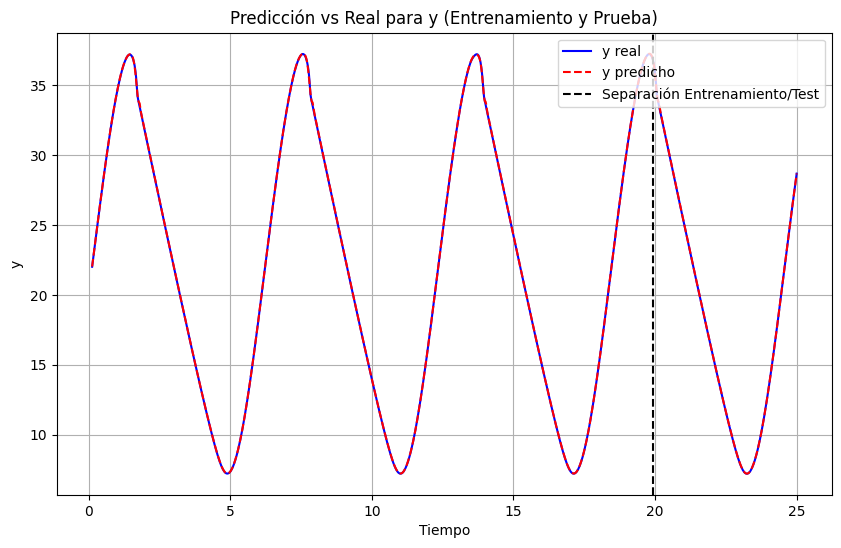

In [ ]:
# Crear una figura para los valores de y
plt.figure(figsize=(10, 6))

# Graficar los resultados reales y predichos de entrenamiento y prueba para y
plt.plot(df_pred['Tiempo'], df_pred['y_real'], label='y real', color='blue')
plt.plot(df_pred['Tiempo'], df_pred['y_predicho'], label='y predicho', color='red', linestyle='dashed')

# Añadir una línea vertical para separar entrenamiento y prueba
plt.axvline(x=df_pred['Tiempo'].iloc[split_index_adjusted], color='black', linestyle='--', label='Separación Entrenamiento/Test')

# Añadir títulos y etiquetas
plt.title('Predicción vs Real para y (Entrenamiento y Prueba)')
plt.xlabel('Tiempo')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

#### Comparación de Trayectorias en el Espacio Fase

Este gráfico muestra una comparación de las trayectorias en el espacio fase entre los modelos dinámico y machine learning. Permite observar cómo evolucionan las variables `x` y `y` de ambos modelos en el espacio fase, y también destaca el punto crítico en color rojo. Es útil para visualizar cómo los modelos siguen diferentes trayectorias.


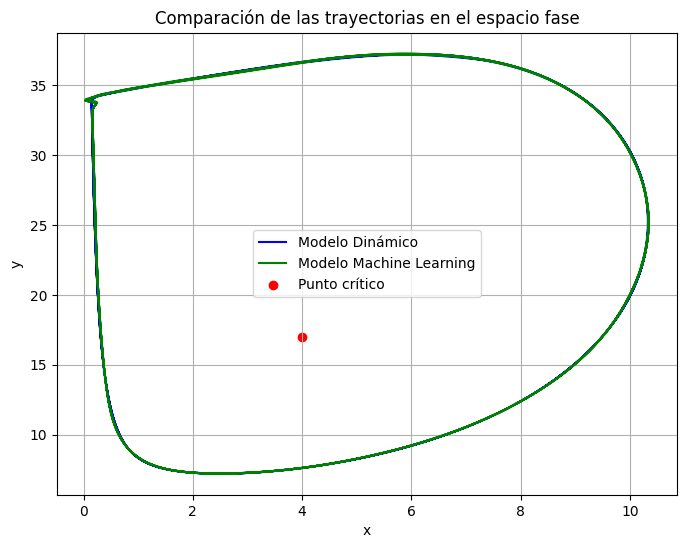

In [ ]:
# Graficar las trayectorias en el espacio fase para ambos modelos
plt.figure(figsize=(8, 6))
plt.plot(df_pred["x_real"], df_pred["y_real"], label="Modelo Dinámico", color='b')
plt.plot(df_pred["x_predicho"], df_pred["y_predicho"], label="Modelo Machine Learning", color='g')
plt.scatter(a/5, 1 + (a/5)**2, color='r', label="Punto crítico")
plt.title('Comparación de las trayectorias en el espacio fase')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#### Función de Predicciones Autoregresivas

La función autoregressive_predictions realiza predicciones futuras utilizando un modelo de red neuronal (como un LSTM) basado en la última secuencia de datos de entrada. Toma como parámetros el modelo, la última secuencia de entrada y el número de pasos futuros a predecir. A medida que realiza cada predicción, actualiza la secuencia de entrada, asegurando que siempre se utilicen las últimas predicciones como parte de las entradas para las siguientes predicciones.

In [ ]:
def autoregressive_predictions(model, X_last_sequence, n_future_steps, n_steps = 5):
    predictions_future = []

    # Usar una copia de la última secuencia para evitar modificar la entrada original
    current_sequence = X_last_sequence.copy()

    for i in range(n_future_steps):
        # Asegurarse de que la secuencia tenga forma (1, n_steps, n_features)
        current_sequence = current_sequence.reshape(1, n_steps, -1)

        # Realizar la predicción para el siguiente valor
        next_pred = model.predict(current_sequence)
        predictions_future.append(next_pred[0])

        # Actualizar la secuencia: eliminar el primer valor y añadir el valor predicho al final
        current_sequence = np.append(current_sequence[:, 1:, :], np.expand_dims(next_pred, axis=1), axis=1)

    return np.array(predictions_future)

#### Parámetros y Predicciones

En esta sección, definimos los parámetros necesarios para las predicciones y obtenemos la última secuencia de nuestro conjunto de datos de entrenamiento/validación. Luego, llamamos a la función de predicciones autoregresivas y mostramos las predicciones futuras generadas.

In [ ]:
# Parámetros
n_future_steps = 500  # Número de pasos futuros a predecir

# Obtener la última secuencia de tu dataset de entrenamiento/validación
X_last_sequence = X_all[-1:]

# Realizar predicciones autoregresivas
future_predictions = autoregressive_predictions(model, X_last_sequence, n_future_steps)

#### Creación del DataFrame para Predicciones Futuras

Aquí creamos un DataFrame que combina los datos reales y las predicciones futuras. Esto incluye las columnas de tiempo, valores reales y valores predichos, permitiendo así una comparación clara entre lo observado y lo anticipado.

In [ ]:
# Crear un DataFrame para las predicciones futuras
n_future_steps = future_predictions.shape[0]  # Número de pasos futuros
time_future = np.linspace(t_eval[-1], t_eval[-1] + n_future_steps * (t_eval[1] - t_eval[0]), n_future_steps)

# Unir las predicciones con los valores reales en un DataFrame
df_pred = pd.DataFrame({
    'Tiempo': np.concatenate((df['Tiempo'][time_steps:].values, time_future)),
    'x_real': np.concatenate((y_all[:, 0], future_predictions[:, 0])),
    'y_real': np.concatenate((y_all[:, 1], future_predictions[:, 1])),
    'x_predicho': np.concatenate((y_pred_all[:, 0], future_predictions[:, 0])),
    'y_predicho': np.concatenate((y_pred_all[:, 1], future_predictions[:, 1]))
})

#### Creación de Gráficos para Predicciones

En esta sección, generamos gráficos que muestran las predicciones de las variables x e y. Los gráficos están organizados en un formato de dos paneles, donde uno muestra las predicciones de x y el otro las de y. Esto nos permite visualizar y comparar fácilmente los datos reales con las predicciones.

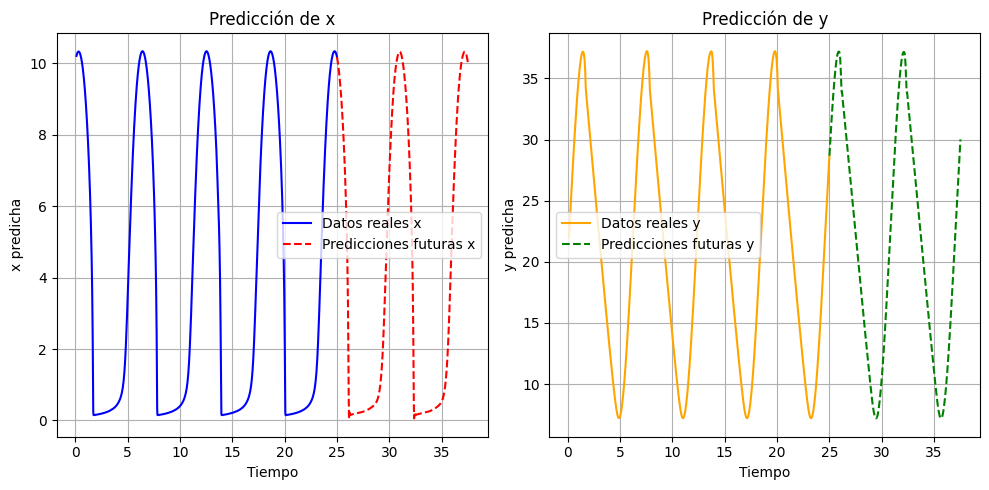

In [ ]:
# Crear un gráfico de tamaño 10x5 para las predicciones
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Graficar 'x_predicho' en el gráfico de la izquierda
ax1.plot(df_pred['Tiempo'][:len(y_all)], df_pred['x_real'][:len(y_all)], label='Datos reales x', color='blue')
ax1.plot(df_pred['Tiempo'][len(y_all):], df_pred['x_predicho'][len(y_all):],
         label='Predicciones futuras x', color='red', linestyle='--')
ax1.set_title('Predicción de x')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('x predicha')
ax1.grid(True)
ax1.legend()

# Graficar 'y_predicho' en el gráfico de la derecha
ax2.plot(df_pred['Tiempo'][:len(y_all)], df_pred['y_real'][:len(y_all)], label='Datos reales y', color='orange')
ax2.plot(df_pred['Tiempo'][len(y_all):], df_pred['y_predicho'][len(y_all):],
         label='Predicciones futuras y', color='green', linestyle='--')
ax2.set_title('Predicción de y')
ax2.set_xlabel('Tiempo')
ax2.set_ylabel('y predicha')
ax2.grid(True)
ax2.legend()

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()